In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('Train.csv')
test_data= pd.read_csv("Test.csv")

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Exploratory Data Analysis

## 1 Univariate Analysis

### 1.1 distribution of Item_Weight, Item_Visibility, Item_MRP

<AxesSubplot:xlabel='Item_MRP'>

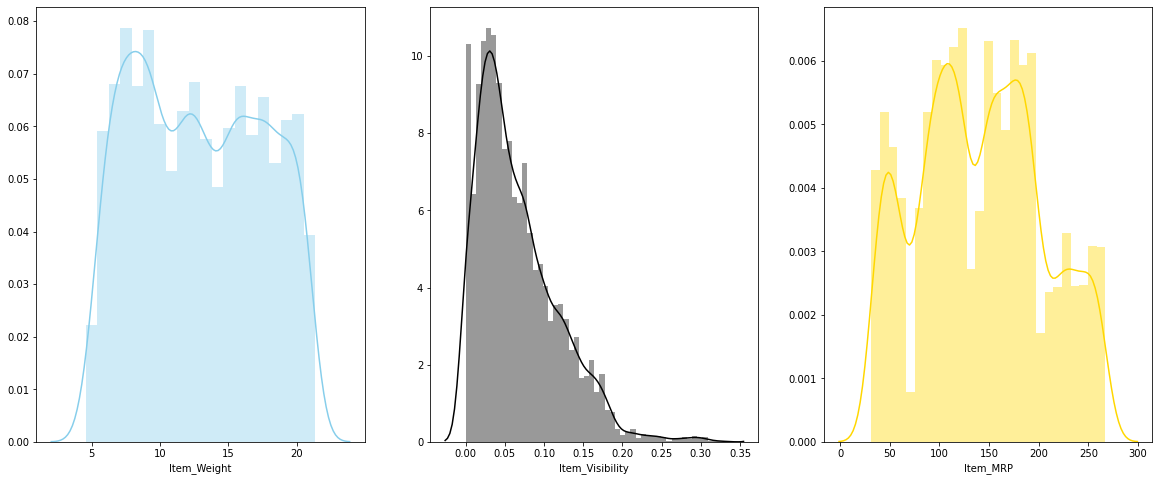

In [6]:

f, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot( train_data["Item_Weight"] , color="skyblue", ax=axes[0])
sns.distplot( train_data["Item_Visibility"] , color="black", ax=axes[1])
sns.distplot( train_data["Item_MRP"] , color="gold", ax=axes[2])
#sns.countplot(train_data['Outlet_Establishment_Year'],ax=axes[1,0])

### 1.2 distribution of Outlet_Establishment_Year

In [7]:
train_data.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

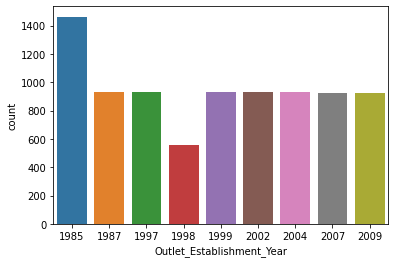

In [8]:

sns.countplot(train_data['Outlet_Establishment_Year'])

### 1.3 distribution of Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type,Outlet_Establishment_Year

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

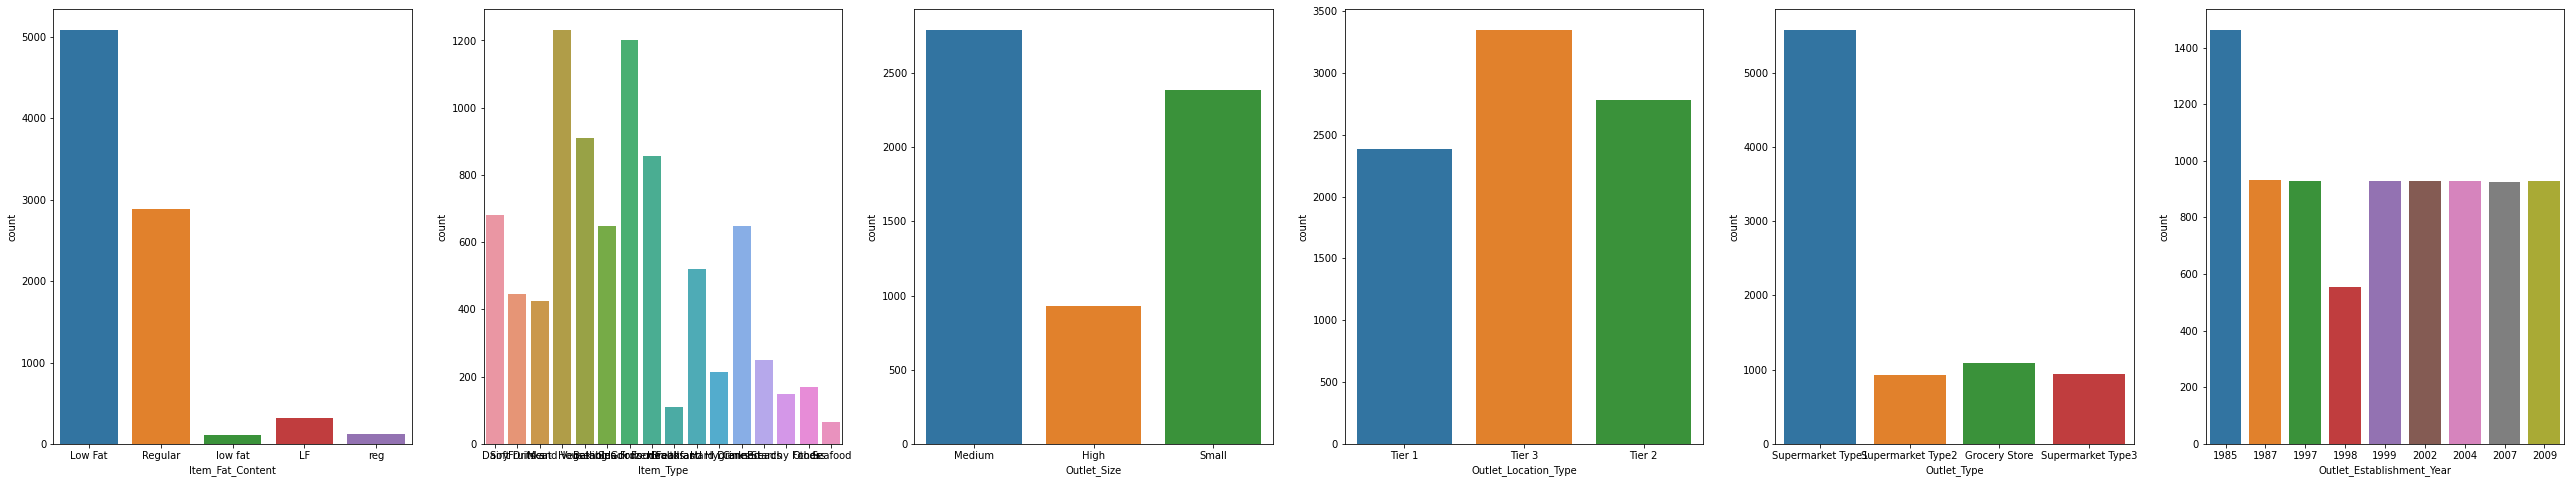

In [9]:
f, axes = plt.subplots(1, 6, figsize=(45, 8))
sns.countplot(train_data['Item_Fat_Content'],ax=axes[0])
sns.countplot(train_data['Item_Type'],ax=axes[1])
sns.countplot(train_data['Outlet_Size'],ax=axes[2])
sns.countplot(train_data['Outlet_Location_Type'],ax=axes[3])
sns.countplot(train_data['Outlet_Type'],ax=axes[4])
sns.countplot(train_data['Outlet_Establishment_Year'],ax=axes[5])

## 2. Bivariate Analysis

### 2.1 Correlation

<AxesSubplot:>

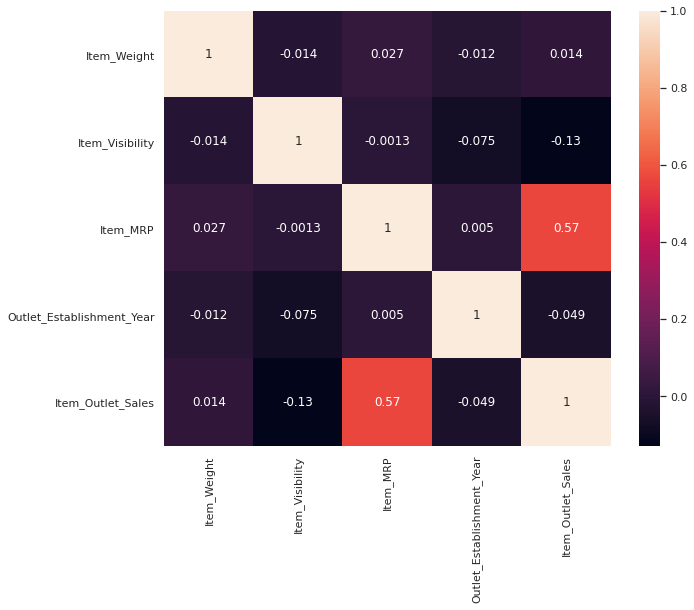

In [10]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1) 
sns.heatmap(data=train_data.corr(),cbar=True,annot=True)

### 2.2 Crossplots

<Figure size 1008x1008 with 0 Axes>

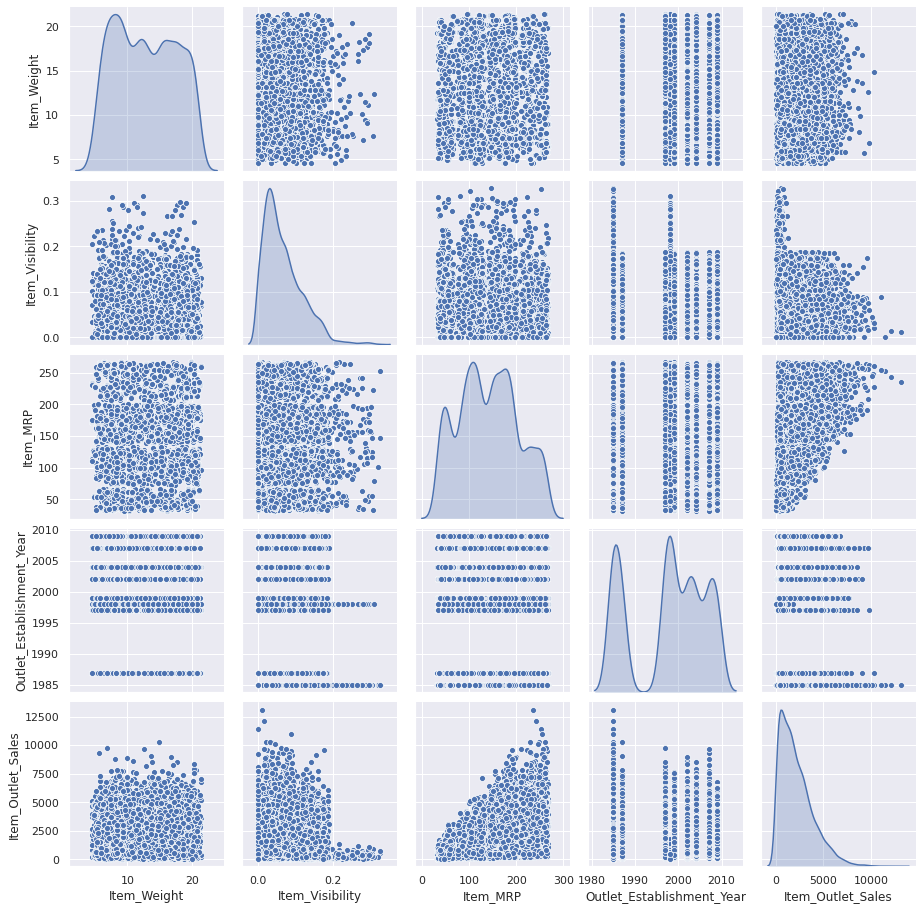

In [11]:
plt.figure(figsize=(14, 14))

sns.pairplot(train_data, diag_kind='kde');

# Missing Value Treatment

In [12]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Text(0.5, 1.0, 'missing value in training dataset')

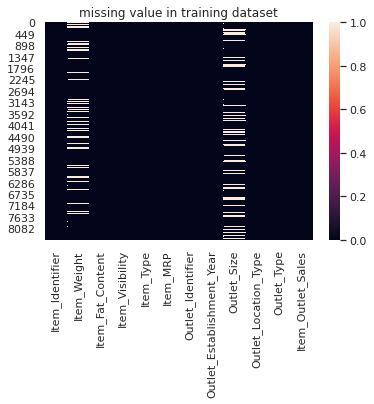

In [13]:
sns.heatmap(train_data.isnull())
plt.title("missing value in training dataset")

Text(0.5, 1.0, 'missing value in test dataset')

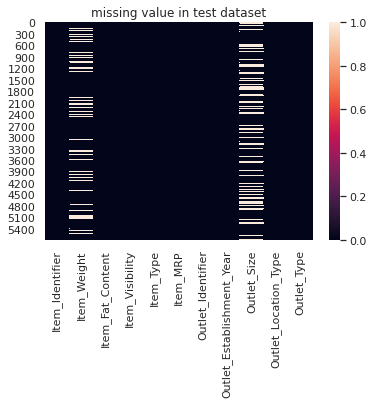

In [14]:
sns.heatmap(test_data.isnull())
plt.title("missing value in test dataset")

In [15]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
train_data['Item_Weight'].fillna(value=train_data.Item_Weight.mean(),inplace=True)
train_data['Outlet_Size'].fillna(value="Medium",inplace=True)

In [17]:
test_data['Item_Weight'].fillna(value=train_data.Item_Weight.mean(),inplace=True)
test_data['Outlet_Size'].fillna(value="Medium",inplace=True)

Text(0.5, 1.0, 'missing value in training dataset')

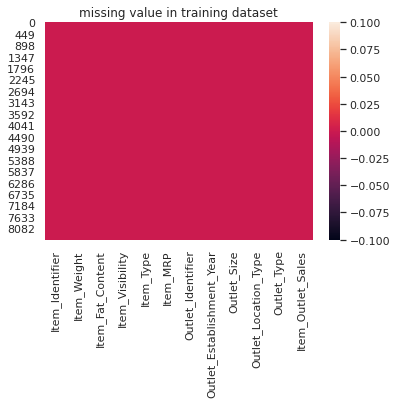

In [18]:
sns.heatmap(train_data.isnull())
plt.title("missing value in training dataset")

Text(0.5, 1.0, 'missing value in test dataset')

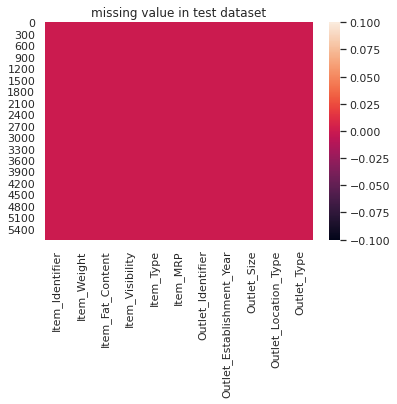

In [19]:
sns.heatmap(test_data.isnull())
plt.title("missing value in test dataset")

# Feature Engineering

In [20]:
# Item_Identifier, Outlet_Identifier are not nessary for prediction. so we are dropping

In [21]:
# for train data set
train_data.drop('Item_Identifier',axis=1,inplace=True)
train_data.drop('Outlet_Identifier',axis=1,inplace=True)
# for test data set
test_data.drop('Item_Identifier',axis=1,inplace=True)
test_data.drop('Outlet_Identifier',axis=1,inplace=True)


In [22]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


## categorical data replacing

#### Item_Fat_Content

In [23]:

fat_datatTraining=pd.get_dummies(train_data['Item_Fat_Content'])
train_data[['LF','Low Fat','Regular','low fat','reg']]=fat_datatTraining
train_data.drop("Item_Fat_Content",axis=1,inplace=True)

In [24]:
fat_datatTest=pd.get_dummies(test_data['Item_Fat_Content'])
test_data[['LF','Low Fat','Regular','low fat','reg']]=fat_datatTest
test_data.drop("Item_Fat_Content",axis=1,inplace=True)

#### Item_Type

In [25]:
Item_Type_training=pd.get_dummies(train_data['Item_Type'])
train_data[['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods']]=Item_Type_training
train_data.drop('Item_Type',axis=1,inplace=True)

In [26]:
Item_Type_test=pd.get_dummies(test_data['Item_Type'])
test_data[['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods']]=Item_Type_test
test_data.drop('Item_Type',axis=1,inplace=True)

#### Outlet_Size

In [27]:
Outlet_Size_train=pd.get_dummies(train_data['Outlet_Size'])
train_data[['High', 'Medium', 'Small']]=Outlet_Size_train
train_data.drop('Outlet_Size',axis=1,inplace=True)

In [28]:
Outlet_Size_test=pd.get_dummies(test_data['Outlet_Size'])
test_data[['High', 'Medium', 'Small']]=Outlet_Size_test
test_data.drop('Outlet_Size',axis=1,inplace=True)

#### Outlet_Location_Type

In [29]:
Outlet_Location_Type_train=pd.get_dummies(train_data['Outlet_Location_Type'])
train_data[['Tier 1', 'Tier 2', 'Tier 3']]=Outlet_Location_Type_train
train_data.drop('Outlet_Location_Type',axis=1,inplace=True)

In [30]:
Outlet_Location_Type_test=pd.get_dummies(test_data['Outlet_Location_Type'])
test_data[['Tier 1', 'Tier 2', 'Tier 3']]=Outlet_Location_Type_test
test_data.drop('Outlet_Location_Type',axis=1,inplace=True)

#### Outlet_Type

In [31]:
Outlet_Type_train=pd.get_dummies(train_data['Outlet_Type'])
train_data[['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']]=Outlet_Type_train
train_data.drop('Outlet_Type',axis=1,inplace=True)

In [32]:
Outlet_Type_test=pd.get_dummies(test_data['Outlet_Type'])
test_data[['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3']]=Outlet_Type_test
test_data.drop('Outlet_Type',axis=1,inplace=True)

# PreProcessing Data

In [33]:
X=train_data.drop('Item_Outlet_Sales',axis=1).values
y=train_data['Item_Outlet_Sales'].values

## train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Modeling
## 1. LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model= LinearRegression()

In [38]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

-68973.61068601403
[ 1.63590487e-01 -2.07203791e+02  1.55745458e+01  3.46730521e+01
 -6.36359098e+01 -2.23693900e+00  6.07252646e+01  1.06413012e+02
 -1.01265428e+02 -7.86309844e+00 -4.48485799e+01 -5.88850112e-01
 -4.63162866e+00 -4.83526544e+01 -4.86919622e+01 -8.12032901e+00
 -8.27910665e+00 -3.01955152e-02 -5.10727855e+01 -9.50644212e+00
  3.67717497e+01  2.74744248e+02 -2.75390315e+01 -4.37832978e+01
 -8.20803572e+00  5.17960626e+02 -2.84229869e+02 -2.33730756e+02
  2.06028148e+02 -1.49838401e+00 -2.04529764e+02 -1.63287277e+03
 -1.17770685e+02 -4.00085091e+02  2.15072855e+03]


In [40]:
y_pred = model.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4426.2384,2937.109539
1,4845.0266,4191.580631
2,2293.0152,4501.015410
3,1065.2800,1885.706555
4,2345.6134,2977.178096
...,...,...
1700,3207.8244,2427.145065
1701,2263.7200,1496.221984
1702,1906.8512,1894.306171
1703,2773.0570,2798.083849


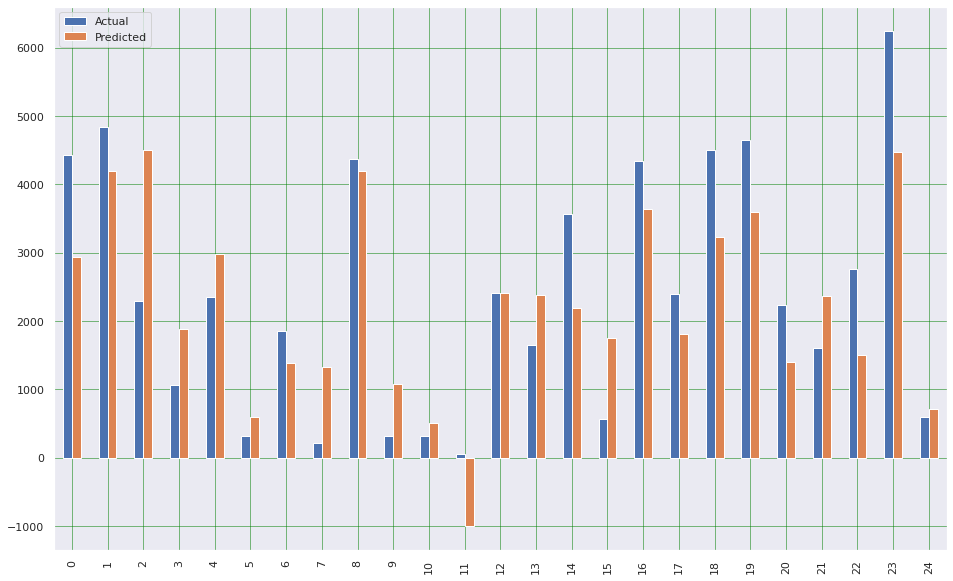

In [42]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 859.6958290867202
Mean Squared Error: 1332101.0001281968
Root Mean Squared Error: 1154.1667990928333


# prediction of test dataset using LinearRegression

In [44]:
test_pred=model.predict(test_data)

<AxesSubplot:>

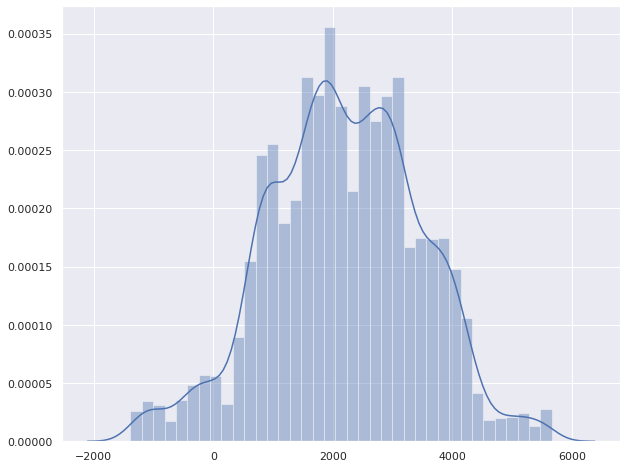

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(test_pred)

# Regularized Linear Regression

# RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model= RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [57]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [59]:
# Use the forest's predict method on the test data
predictions = model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 805.25 degrees.


In [65]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 42.9 %.


In [67]:
test_pred=model.predict(test_data)

<AxesSubplot:>

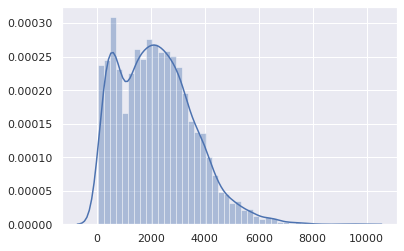

In [68]:
sns.distplot(test_pred)

# XGBoost

In [70]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [72]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [74]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [75]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[04:12:59] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:00] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [76]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1592.733383


# k-fold Cross Validation using XGBoost

In [77]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[04:13:25] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:25] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:25] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [78]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2599.984212,21.177557,2600.139893,44.617401
1,2432.451009,14.085785,2435.875570,54.738523
2,2272.806397,23.079215,2277.491781,46.251904
3,2143.696126,26.754384,2148.833089,42.037921
4,2003.553670,18.623245,2011.811686,45.146851


In [79]:
print((cv_results["test-rmse-mean"]).tail(1))

49    1104.160278
Name: test-rmse-mean, dtype: float64


## visualize Boosting Trees and Feature Importance

<Figure size 1008x576 with 0 Axes>

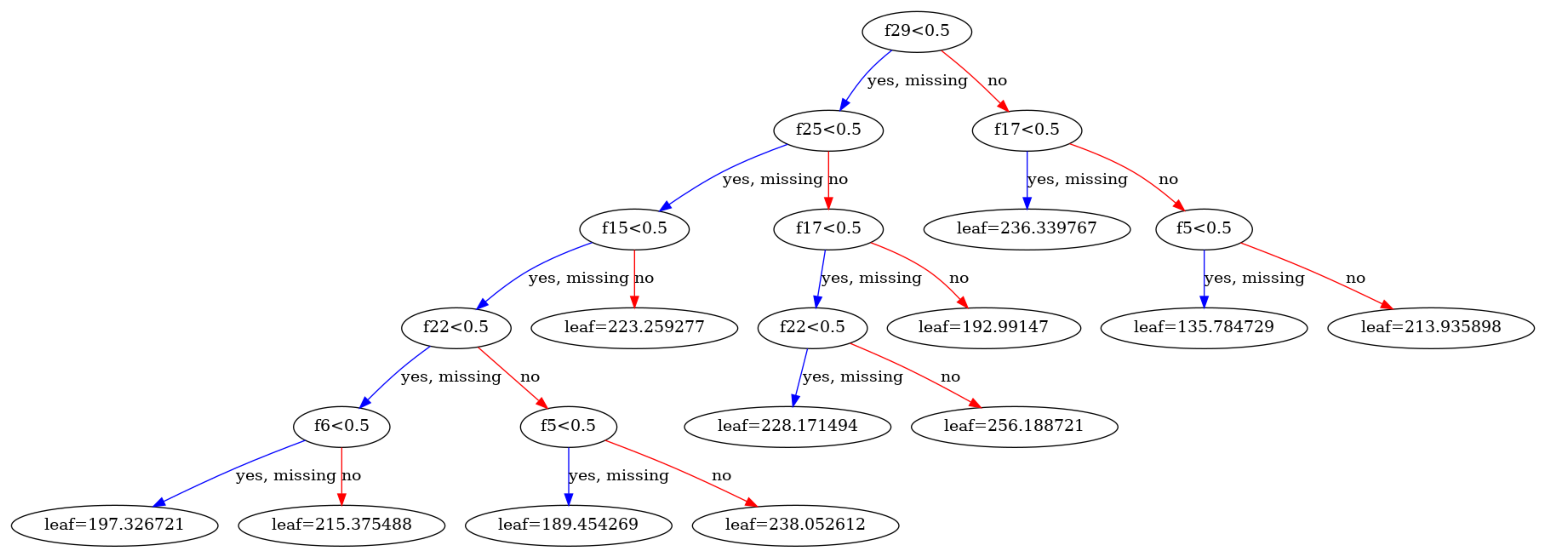

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

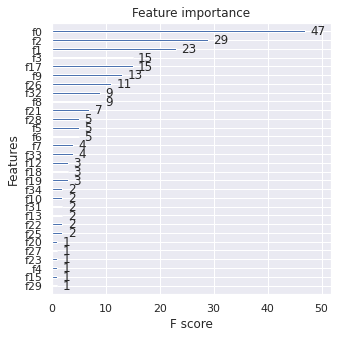

In [86]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()